In [278]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings("ignore")

In [268]:
#Read the excel file and store the sheets into dataframes.
#my local directory location.
df = pd.ExcelFile('C:/Users/jaina/OneDrive/Desktop/Python Hackathon 2/V02Max_Combined.xlsx')
kay = pd.read_excel(df, sheet_name = 'Kayaking')
ath = pd.read_excel(df, sheet_name = 'Athletes')
tri = pd.read_excel(df, sheet_name = 'Triathlon')
fen = pd.read_excel(df, sheet_name = 'Fencing')

## Qn1 Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [101]:
#Concatenating all sport related table to one dataframe final_table
final_table=pd.concat([fen[['ID','time','RR','VO2','power']],
                       kay[['ID','time','RR','VO2','power']],
                       tri[['ID','time','RR','VO2','power']]],ignore_index=True)

#defining output excel file name
output='FinalVO2_Table.xlsx'

#writing dataframe to excel using to_excel
final_table.to_excel(output,index=False)
print("Dataframe successfully written to Excel file",output)

#Reading the excel file back into dataframe for verification
print("\nReading",output,"Excel file for Verification:")
sportdf=pd.read_excel("FinalVO2_Table.xlsx")
print(sportdf)

Dataframe successfully written to Excel file FinalVO2_Table.xlsx

Reading FinalVO2_Table.xlsx Excel file for Verification:
       ID     time     RR       VO2  power
0       1 -130.840  672.0  0.302008      0
1       1 -130.168  672.0  0.302008      0
2       1 -129.536  632.0  0.301336      0
3       1 -128.824  712.0  0.301336      0
4       1 -127.948  876.0  0.301336      0
...    ..      ...    ...       ...    ...
52057  18  947.288  536.0  0.507071      0
52058  18  947.816  528.0  0.507071      0
52059  18  948.344  528.0  0.507071      0
52060  18  948.884  540.0  0.507071      0
52061  18  949.424  540.0  0.507071      0

[52062 rows x 5 columns]


## Qn2 Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [52]:
#Initialize Dataframe phase
phase=pd.DataFrame(final_table)

#initialize Phase column
phase['Phase']='Other Phase'

#Apply conditions to find Warm Up-time less than 0,GET-time>=0 and power>0,Cool Down-time>0 and power=0
phase.loc[phase['time']<0,'Phase']='Warm Up'
phase.loc[(phase['time']>=0) & (phase['power']>0),'Phase']='GET'
phase.loc[(phase['time']>0) & (phase['power']==0),'Phase']='Cool Down'

#print dataframe phase details
print(phase)

       ID     time     RR       VO2  power      Phase
0       1 -130.840  672.0  0.302008      0    Warm Up
1       1 -130.168  672.0  0.302008      0    Warm Up
2       1 -129.536  632.0  0.301336      0    Warm Up
3       1 -128.824  712.0  0.301336      0    Warm Up
4       1 -127.948  876.0  0.301336      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  18  947.288  536.0  0.507071      0  Cool Down
52058  18  947.816  528.0  0.507071      0  Cool Down
52059  18  948.344  528.0  0.507071      0  Cool Down
52060  18  948.884  540.0  0.507071      0  Cool Down
52061  18  949.424  540.0  0.507071      0  Cool Down

[52062 rows x 6 columns]


## Qn3 What was the average time each tested lasted excluding warm up for all athletes?

In [78]:
import pandas as pd

def calculate_cool_down_average(final_table):
  """Calculates the average cool down time from a DataFrame.

  Args:
    final_table: A Pandas DataFrame containing columns like 'time' and 'power'.

  Returns:
    The average cool down time.
  """

  # Create a copy of the DataFrame to avoid modifying the original
  phase = final_table.copy()

  # Initialize Phase column
  phase['Phase'] = 'Other Phase'

  # Apply conditions to find phases
  phase.loc[(phase['time'] < 0), 'Phase'] = 'Warm Up'
  phase.loc[(phase['time'] >= 0) & (phase['power'] > 0), 'Phase'] = 'GET'
  phase.loc[(phase['time'] > 0) & (phase['power'] == 0), 'Phase'] = 'Cool Down'

  # Filter for Cool Down phase and calculate average time
  cool_down_data = phase[phase['Phase'] == 'Cool Down']
  average_cool_down_time = cool_down_data['time'].mean()

  return average_cool_down_time

# Example usage:
# Assuming final_table is your DataFrame
average_cool_down = calculate_cool_down_average(final_table)
print("Average cool down time:", average_cool_down)

Average cool down time: 993.9884049295774


## Qn4 Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

## Qn5 What was the average time each test lasted (including warm up) for all athletes?

In [121]:
import pandas as pd

def calculate_phase_averages(final_table):
  """Calculates average warm-up, GET, and cool-down times from a DataFrame.

  Args:
    final_table: A Pandas DataFrame containing columns like 'time' and 'power'.

  Returns:
    A dictionary with average warm-up, GET, and cool-down times.
  """

  phase = final_table.copy()
  phase['Phase'] = 'Other Phase'
  phase.loc[(phase['time'] < 0), 'Phase'] = 'Warm Up'
  phase.loc[(phase['time'] >= 0) & (phase['power'] > 0), 'Phase'] = 'GET'
  phase.loc[(phase['time'] > 0) & (phase['power'] == 0), 'Phase'] = 'Cool Down'

  average_warm_up_time = phase[phase['Phase'] == 'Warm Up']['time'].abs().mean()  # Absolute value for warm-up
  average_get_time = (phase[phase['Phase'] == 'GET']['time'].max() - phase[phase['Phase'] == 'GET']['time'].min()) / len(phase[phase['Phase'] == 'GET']['ID'].unique())
  average_cool_down_time = phase[phase['Phase'] == 'Cool Down']['time'].mean()

  return {'average_warm_up': average_warm_up_time,
          'average_get': average_get_time,
          'average_cool_down': average_cool_down_time}

# Example usage:
# Assuming final_table is your DataFrame
phase_averages = calculate_phase_averages(final_table)
print("Average warm-up time:", phase_averages['average_warm_up'])
print("Average GET time:", phase_averages['average_get'])
print("Average cool-down time:", phase_averages['average_cool_down'])

Average warm-up time: 90.05824569676963
Average GET time: 70.43377777777778
Average cool-down time: 993.9884049295774


## Qn6 What was the most common wattage (above 0) achieved by participants and for how many seconds (average time)? You may choose to show averages based on any one/all sports. 

## Qn7 Create a correlation matrix to show the relationship between HR, BMI and sport.

Index(['ID', 'bmi', 'HR', 'sport_fencing', 'sport_kayak', 'sport_triathlon'], dtype='object')
Correlation matrix is : 
                       ID       bmi        HR  sport_fencing  sport_kayak  \
ID               1.000000 -0.286405 -0.017636      -0.862194     0.575765   
bmi             -0.286405  1.000000 -0.055079      -0.123586     0.486804   
HR              -0.017636 -0.055079  1.000000       0.039244    -0.035366   
sport_fencing   -0.862194 -0.123586  0.039244       1.000000    -0.821351   
sport_kayak      0.575765  0.486804 -0.035366      -0.821351     1.000000   
sport_triathlon  0.515729 -0.591149 -0.008736      -0.345537    -0.251481   

                 sport_triathlon  
ID                      0.515729  
bmi                    -0.591149  
HR                     -0.008736  
sport_fencing          -0.345537  
sport_kayak            -0.251481  
sport_triathlon         1.000000  


<Axes: >

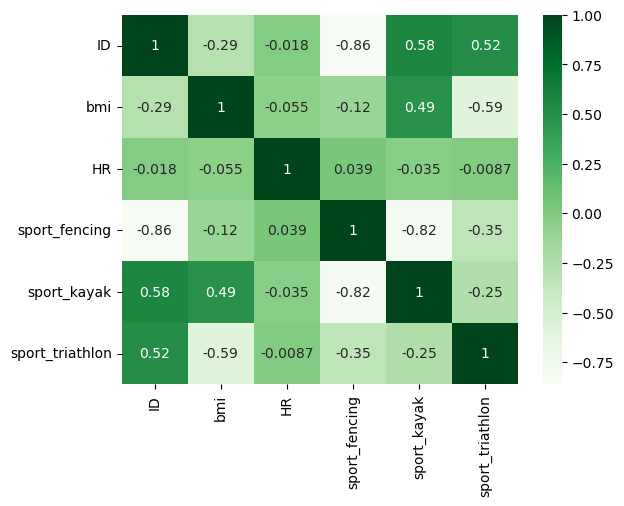

In [240]:
# form dataframe

sportdf=pd.read_excel("FinalVO2_Table.xlsx")

#  represents HR ( Heart Rate )

sportdf['HR']=round(60/(sportdf['RR']/1000),2)

#  sportdf1 Table having HR and ID ( Primary Key )
sportdf1=sportdf[['ID','HR']]


#  ath2 Table having sport, bmi and ID column
ath2=ath1[['ID','sport','bmi']]

#  merge data frame
mergedf=pd.merge(ath2,sportdf1, on="ID")

# Convert categorical 'Sport' to numerical using one-hot encoding

df = pd.get_dummies(mergedf, columns=['sport'])
print(df.columns)

# plotting correlation matrix
matrix = df.corr()

# Visualize correlation matrix using heatmap
print("Correlation matrix is : ")
print(matrix)
sns.heatmap(matrix, cmap="Greens", annot=True)

## Qn8 What are the names of the kayaking athletes?

In [137]:

# loading value from 'ath' DataFrame
nam=pd.DataFrame(ath)

# Filter for kayaking athletes
kayak_names = nam[nam['sport'] == 'kayak']

# Extract and print the names of Kayak athletes 
print(kayak_names['First Name']+" "+kayak_names['Last Name'])

10    Isabella Griffin
11         Caleb Dixon
12       Mia Carpenter
13     Harper Mitchell
14       Mason Wallace
15      Logan Anderson
dtype: object


## Qn9 What was the average HRV of the triathletes?

## Qn 10 How long was athlete 12 in HR Zone 5?

## Qn 11 Create any 3d plot using any data. Values do not have to be from the dataset given. 

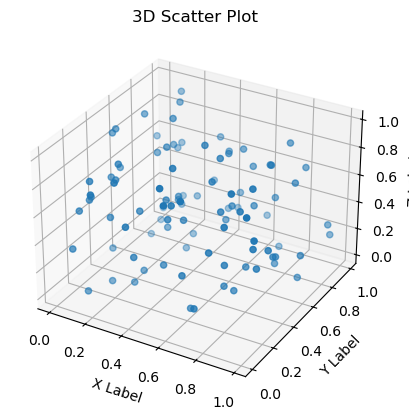

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate random data
np.random.seed(42)  # For reproducibility
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

## Qn 12 What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [252]:
#Load athlete details into dataframe
VO2ml=pd.DataFrame(ath)

#Sum the VO2 values for each ID
Sum_VO2 = final_table.groupby('ID')['VO2'].sum().reset_index() 

#Merge sum of VO2 values for each id to VO2ml dataframe
VO2ml=VO2ml.merge(Sum_VO2,on='ID')

#Find VO2ml/kg which is VO2ml/min divided by each athlete weight
VO2ml['VO2ml/kg']=VO2ml['VO2']/VO2ml['Weight']

#Highest 3 V02 Maxes record using nlargest method

top_3_vo2max = VO2ml.nlargest(3, 'VO2ml/kg')[['ID','First Name','Last Name','sport','VO2ml/kg']]


print('Athlete Details Highest 3 V02 Maxes record')

#display every athlete's VO2ml/kg values
top_3_vo2max.style.hide(axis='index')



Athlete Details Highest 3 V02 Maxes record


ID,First Name,Last Name,sport,VO2ml/kg
12,Caleb,Dixon,kayak,92.258212
13,Mia,Carpenter,kayak,90.758693
11,Isabella,Griffin,kayak,89.586903


## Qn 13 Calculate the year of birth of each athlete and store it as a column in the tables.

In [282]:
from datetime import datetime

# loading ath1 DataFrame
ath1 = pd.read_excel(df, sheet_name = 'Athletes')

#Calculates the year of birth given the current age and year.
current_year = datetime.now().year

#Calculates the year of birth of each athlete 
ath1['birth_year'] = current_year - ath1['age']

#Print year of birth of each athlete 
print(ath1['ID'], ath1['birth_year'])



0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
Name: ID, dtype: int64 0     2009
1     2009
2     2008
3     2008
4     2007
5     2007
6     2009
7     2009
8     2010
9     2010
10    2006
11    2006
12    2006
13    2011
14    2011
15    2008
16    2012
17    2012
Name: birth_year, dtype: int64


In [256]:
#Load athlete details into dataframe
VO2ml=pd.DataFrame(ath)

#Sum the VO2 values for each ID
Sum_VO2 = final_table.groupby('ID')['VO2'].sum().reset_index() 

#Merge sum of VO2 values for each id to VO2ml dataframe
VO2ml=VO2ml.merge(Sum_VO2,on='ID')

#Find VO2ml/kg which is VO2ml/min divided by each athlete weight
VO2ml['VO2ml/kg']=VO2ml['VO2']/VO2ml['Weight']

#Lowest 3 V02 Maxes record using nsmallest method
bottom_3_vo2min = VO2ml.nsmallest(3, 'VO2ml/kg')[['ID','First Name','Last Name','sport','VO2ml/kg']]


print('Athlete Details lowest 3 V02  record')

#display every athlete's VO2ml/kg values
bottom_3_vo2min.style.hide(axis='index')


Athlete Details lowest 3 V02  record


ID,First Name,Last Name,sport,VO2ml/kg
7,Grace,Simmons,fencing,38.403988
2,Ethan,Reynolds,fencing,38.632602
1,Olivia,Martinez,fencing,42.807730


## Qn 15 "Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
Zone 1 (recovery/easy)       <100 HR max
Zone 2 (aerobic/base)        100-120 HR max
Zone 3 (tempo)        120-135 HR max
Zone 4 (lactate threshold)        135-155 HR max
Zone 5 (anaerobic)        155+ HR max and above"

In [290]:
#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age

#import pandas as pd

#det1['MaxHR']=220-det1['age']

def assign_heart_rate_zone(row, hr_max):
  """Assigns a heart rate zone based on the given HR and HR max."""
  hr = row['HR']
  if hr < 100:
    return 'Zone 1 (recovery/easy)'
  elif hr < 120:
    return 'Zone 2 (aerobic/base)'
  elif hr < 135:
    return 'Zone 3 (tempo)'
  elif hr < 155:
    return 'Zone 4 (lactate threshold)'
  else:
    return 'Zone 5 (anaerobic)'

def add_heart_rate_zone(df, hr_max_column):
  """Adds a heart rate zone column to the DataFrame."""
  df['HR Zone'] = df.apply(lambda row: assign_heart_rate_zone(row, df[hr_max_column][row.name]), axis=1)
  return df
    
    
#merge dateframes on ID to include age column 
#det1=Zn.merge(Zn1[['ID','age','First Name','Last Name']],on='ID')

#det1['MaxHR']=220-det1['age']

# loading value from 'ath' DataFrame
#nam=pd.DataFrame(ath)



data = {
    'Athlete':['ABC','ABC1','ABC2'],
    'Sport': ['Running', 'Swimming', 'Cycling'],
    'HR': [120, 140, 160],
    'HR Max': [180, 170, 190]
}

df = pd.DataFrame(data)

# Add the heart rate zone column
df = add_heart_rate_zone(df, 'HR Max')

print(df)


  Athlete     Sport   HR  HR Max                     HR Zone
0     ABC   Running  120     180              Zone 3 (tempo)
1    ABC1  Swimming  140     170  Zone 4 (lactate threshold)
2    ABC2   Cycling  160     190          Zone 5 (anaerobic)


## Qn16 Calculate the BMI of every athlete and display it as a list.

In [284]:
# loading dataframe 
ath1 = pd.read_excel(df, sheet_name = 'Athletes')

#calculating BMI values
ath1['bmi']=round((ath1['Weight']/(ath1['Height']**2)),4)

# bmi list
bmi_list=list(ath1['bmi'])

#print list
print(bmi_list)

# type of list
print(type(bmi_list))

[0.0021, 0.0021, 0.0025, 0.0024, 0.0022, 0.0023, 0.0018, 0.0019, 0.0018, 0.0019, 0.0026, 0.0026, 0.0025, 0.0021, 0.0021, 0.0021, 0.0016, 0.0016]
<class 'list'>
